In [48]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Preprocessing

In [49]:
# Read the raw datasets
raw_recipes_df = pd.read_csv('/Users/juanmontreuil/Desktop/AI Recipes/Data/RAW_recipes.csv')
raw_users_df = pd.read_csv('/Users/juanmontreuil/Desktop/AI Recipes/Data/RAW_interactions.csv')

In [50]:
# Check data sample
raw_recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [51]:
# Check data sample
raw_users_df.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [52]:
# Shapes
print(f"Recipes DataFrame shape: {raw_recipes_df.shape}")
print(f"Users DataFrame shape: {raw_users_df.shape}")

Recipes DataFrame shape: (231637, 12)
Users DataFrame shape: (1132367, 5)


In [53]:
# Check for nulls
raw_recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [54]:
# Check for nulls
raw_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [55]:
# data conversion
raw_recipes_df['id'] = raw_recipes_df['id'].astype(str)
raw_recipes_df['contributor_id'] = raw_recipes_df['contributor_id'].astype(str)
raw_recipes_df['submitted'] = pd.to_datetime(raw_recipes_df['submitted'], format='%Y-%m-%d')
raw_users_df['user_id'] = raw_users_df['user_id'].astype(str)
raw_users_df['recipe_id'] = raw_users_df['recipe_id'].astype(str)
raw_users_df['date'] = pd.to_datetime(raw_users_df['date'], format='%Y-%m-%d')

Analyzing nulls

In [56]:
# There is a null value in the name column
null_name_recipes = raw_recipes_df[raw_recipes_df['name'].isnull()]

In [57]:
# Display info to guess the recipe
print(null_name_recipes["ingredients"].values[0])
print(null_name_recipes["steps"].values[0])

['lemon', 'honey', 'horseradish mustard', 'garlic clove', 'dried parsley', 'dried basil', 'dried thyme', 'garlic salt', 'black pepper', 'olive oil']
['in a bowl , combine ingredients except for olive oil', 'slowly whisk inches', 'olive oil until thickened', 'great with field greens', 'makes about 2 / 3', 'cup dressing']


GPT suggests that the recipe is lemon honey mustard salad

In [58]:
#Inputate the null value with GPT suggestion
raw_recipes_df['name'].fillna("lemon honey mustard salad", inplace=True)

/var/folders/n6/jxm6p02x0cj1szpn73f95xfh0000gn/T/ipykernel_3045/1051823596.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_recipes_df['name'].fillna("lemon honey mustard salad", inplace=True)


In [59]:
#check row
raw_recipes_df[raw_recipes_df['name'] == 'lemon honey mustard salad']

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
721,lemon honey mustard salad,368257,10,779451,2009-04-27,"['15-minutes-or-less', 'time-to-make', 'course...","[1596.2, 249.0, 155.0, 0.0, 2.0, 112.0, 14.0]",6,"['in a bowl , combine ingredients except for o...",-------------,"['lemon', 'honey', 'horseradish mustard', 'gar...",10


In [60]:
# Inputate the description for the missing recipe
description = "A tangy and sweet vinaigrette made with lemon, honey, horseradish mustard, garlic, and a blend of dried herbs. Perfect for drizzling over field greens or your favorite salad."
raw_recipes_df.loc[raw_recipes_df['name'] == 'lemon honey mustard salad', 'description'] = description

In [61]:
#check row
raw_recipes_df[raw_recipes_df['name'] == 'lemon honey mustard salad']

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
721,lemon honey mustard salad,368257,10,779451,2009-04-27,"['15-minutes-or-less', 'time-to-make', 'course...","[1596.2, 249.0, 155.0, 0.0, 2.0, 112.0, 14.0]",6,"['in a bowl , combine ingredients except for o...","A tangy and sweet vinaigrette made with lemon,...","['lemon', 'honey', 'horseradish mustard', 'gar...",10


In [62]:
#check nulls sum
raw_recipes_df.isnull().sum()

name                 0
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

In [63]:
#We will drop the nulls in the description column
raw_recipes_df.dropna(subset=['description'], inplace=True)

In [64]:
#check nulls sum
raw_recipes_df.isnull().sum()

name              0
id                0
minutes           0
contributor_id    0
submitted         0
tags              0
nutrition         0
n_steps           0
steps             0
description       0
ingredients       0
n_ingredients     0
dtype: int64

Now, we will check the users dataset

In [65]:
#check nulls sum
raw_users_df.isnull().sum()

user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64

In [66]:
# Drop rows with missing description
raw_users_df.dropna(subset=['review'], inplace=True)

In [67]:
#check nulls sum
raw_users_df.isnull().sum()

user_id      0
recipe_id    0
date         0
rating       0
review       0
dtype: int64

Analyzing duplicates

In [68]:
# Duplicated rows
print("duplicated rows in recipes dataset:", raw_recipes_df.duplicated().sum())
print("duplicated rows in user interactions dataset:", raw_users_df.duplicated().sum())

duplicated rows in recipes dataset: 0
duplicated rows in user interactions dataset: 0


In [69]:
#Count unique recipes
print("Unique recipes in recipes dataset:", raw_recipes_df['id'].nunique())

Unique recipes in recipes dataset: 226658


Check for outliers

In [70]:
# Summary statistics of recipes dataset, normalizing the minutes columns
pd.set_option('display.float_format', lambda x: '%.2f' % x)
raw_recipes_df.describe()

,minutes,submitted,n_steps,n_ingredients
count,226658.00,226658,226658.00,226658.00
mean,9602.43,2006-12-22 20:58:46.525425920,9.77,9.05
min,0.00,1999-08-06 00:00:00,0.00,1.00
25%,20.00,2004-12-08 00:00:00,6.00,6.00
50%,40.00,2007-02-17 00:00:00,9.00,9.00
75%,65.00,2008-11-11 18:00:00,12.00,11.00
max,2147483647.00,2018-12-04 00:00:00,145.00,43.00
std,4510704.81,NaN,6.00,3.74


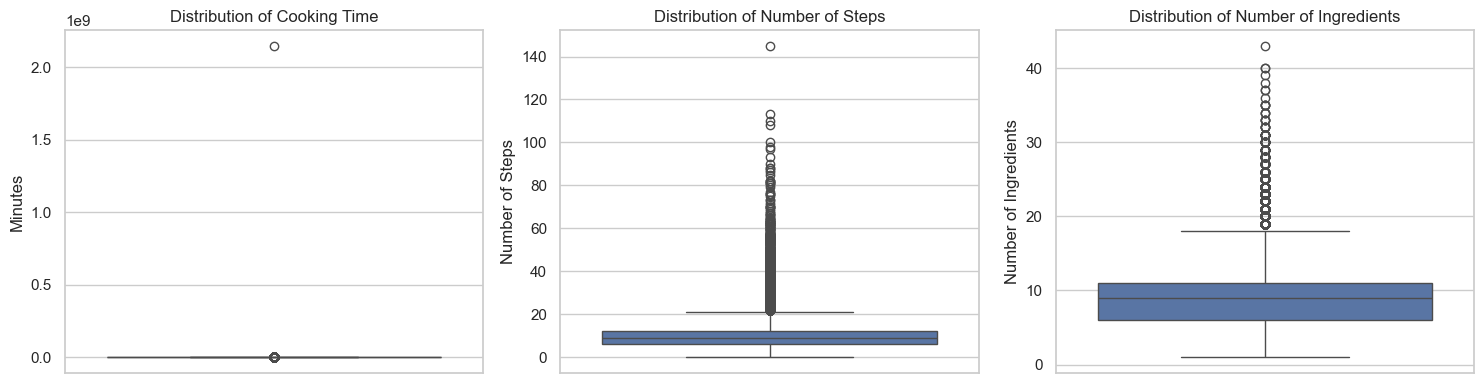

In [71]:
#Generate boxplots
# Create a figure with three subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# Plot boxplot of 'minutes' on the first subplot
sns.boxplot(data=raw_recipes_df["minutes"], ax=ax[0])
ax[0].set_ylabel('Minutes')
ax[0].set_title('Distribution of Cooking Time')

# Plot boxplot of 'n_steps' on the second subplot
sns.boxplot(data=raw_recipes_df["n_steps"], ax=ax[1])
ax[1].set_ylabel('Number of Steps')
ax[1].set_title('Distribution of Number of Steps')

# Plot boxplot of 'n_ingredients' on the third subplot
sns.boxplot(data=raw_recipes_df["n_ingredients"], ax=ax[2])
ax[2].set_ylabel('Number of Ingredients')
ax[2].set_title('Distribution of Number of Ingredients')

plt.tight_layout()
plt.show()

Observamos outliers

In [72]:
# Cooking time
# Calculate the first quartile, third quartile and the interquartile range
Q1 = raw_recipes_df['minutes'].quantile(0.25)
Q3 = raw_recipes_df['minutes'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# Filter the data for values that are greater than max_value or less than min_value
minutes_outliers = raw_recipes_df[(raw_recipes_df['minutes'] > max_value) | (raw_recipes_df['minutes'] < min_value)]
minutes_outliers.sort_values('minutes')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
206778,sweet rice pudding,454411,133,1889545,2011-04-25,"['time-to-make', 'course', 'main-ingredient', ...","[338.6, 12.0, 185.0, 3.0, 16.0, 20.0, 19.0]",23,"['place the rice in a medium-sized bowl', 'fil...",this is a traditional recipe from india and it...,"['basmati rice', 'whole milk', 'granulated sug...",7
204465,super soft bread machine rolls with wheat germ,210241,133,260718,2007-02-09,"['time-to-make', 'course', 'main-ingredient', ...","[1580.3, 93.0, 106.0, 92.0, 83.0, 171.0, 71.0]",7,"['in bread machine pan , put in the following ...",this recipe is adapted from the buttery bread ...,"['milk', 'vanilla essence', 'butter', 'sugar',...",9
94271,gooey butter cookies,34390,133,43121,2002-07-16,"['weeknight', 'time-to-make', 'course', 'prepa...","[163.3, 14.0, 49.0, 8.0, 3.0, 23.0, 5.0]",8,"['cream together cream cheese and butter', 'ad...",so easy to make and always a hit!,"['cream cheese', 'butter', 'egg', 'vanilla', '...",6
99018,grilled halibut with lemon tarragon mustard,116898,134,39547,2005-04-12,"['time-to-make', 'course', 'main-ingredient', ...","[470.1, 23.0, 2.0, 16.0, 153.0, 12.0, 1.0]",8,['in a small bowl whisk together the lemon jui...,"adapted from a recipe in ""the taste of summer""...","['fresh lemon juice', 'lemon, zest of', 'dijon...",9
183119,sea bass with citrus and soy,23101,134,8688,2002-03-21,"['weeknight', 'time-to-make', 'course', 'main-...","[275.1, 16.0, 24.0, 60.0, 69.0, 9.0, 3.0]",14,"['mix first 6 ingredients in 8x8x2"" glass baki...","simple, elegant and healthy, too! what more ca...","['pineapple juice', 'orange juice', 'soy sauce...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
106963,homemade vanilla,425681,259205,28177,2010-05-16,"['time-to-make', 'preparation', '5-ingredients...","[69.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",9,['slice the vanilla beans length-wise and scra...,found this recipe on tammy's blog (http://www....,"['vanilla beans', 'vodka']",2
38116,celtic druid s honey mead meade metheglin,216215,259260,242729,2007-03-11,"['time-to-make', 'course', 'main-ingredient', ...","[531.0, 0.0, 561.0, 1.0, 1.0, 0.0, 47.0]",18,"['equipement:', 'very large pan - to hold 12 p...","mead, made from fermented honey, was the earli...","['gingerroot', 'lemons, juice and rind of', 'w...",7
106563,homemade fruit liquers,291571,288000,553251,2008-03-12,"['time-to-make', 'course', 'main-ingredient', ...","[836.2, 0.0, 333.0, 0.0, 0.0, 0.0, 27.0]",12,"['rinse the fruit or berries , fruit must be c...",this should be a nice easy project for those w...,"['berries', 'vodka', 'granulated sugar']",3
109624,how to preserve a husband,447963,1051200,576273,2011-02-01,"['time-to-make', 'course', 'preparation', 'for...","[407.4, 57.0, 50.0, 1.0, 7.0, 115.0, 5.0]",9,"['be careful in your selection', ""don't choose...","found this in a local wyoming cookbook ""a coll...","['cream', 'peach']",2


In [73]:
# Replace thie cooking time with 25 minutes for the outlier recipe
raw_recipes_df.loc[raw_recipes_df['id'] == '261647', 'minutes'] = 25

# Check value
raw_recipes_df[raw_recipes_df['id'] == '261647']

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
144074,no bake granola balls,261647,25,464080,2007-10-26,"['60-minutes-or-less', 'time-to-make', 'course...","[330.3, 23.0, 110.0, 4.0, 15.0, 24.0, 15.0]",9,"['preheat the oven to 350 degrees', 'spread oa...",healthy snacks that kids (and grown ups) will ...,"['rolled oats', 'unsweetened dried shredded co...",8


In [74]:
#drop recipe with minute = 1051200, recipe id 447963
raw_recipes_df = raw_recipes_df[raw_recipes_df['id'] != 447963]


Hacemos lo mismo para el numero de steps

In [75]:
# Number of steps
# Calculate the first quartile, third quartile and the interquartile range
Q1 = raw_recipes_df['n_steps'].quantile(0.25)
Q3 = raw_recipes_df['n_steps'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# Filter the data for values that are greater than max_value or less than min_value
nsteps_outliers = raw_recipes_df[(raw_recipes_df['n_steps'] > max_value) | (raw_recipes_df['n_steps'] < min_value)]
nsteps_outliers.sort_values('n_steps')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
216131,traditional iraqi casserole tepsi baytinijan,288850,90,510313,2008-02-27,"['time-to-make', 'course', 'main-ingredient', ...","[375.5, 20.0, 51.0, 7.0, 44.0, 25.0, 15.0]",22,['peel the eggplant in wide stripes and remove...,in iraq tepsi baytinijan is a very famous dish...,"['eggplants', 'tomatoes', 'onion', 'garlic clo...",10
70506,deep dish pizza with sausage garlic and mozz...,224394,75,37779,2007-04-24,"['time-to-make', 'course', 'main-ingredient', ...","[929.5, 104.0, 48.0, 113.0, 107.0, 147.0, 7.0]",22,['position oven rack on the 2nd-lowest level i...,a husband favorite,"['olive oil', 'pizza dough', 'mild italian sau...",7
169411,quick tikka masala,369865,45,31807,2009-05-05,"['60-minutes-or-less', 'time-to-make', 'course...","[514.5, 41.0, 8.0, 8.0, 114.0, 54.0, 2.0]",22,['grate 1 piece of ginger into a large zip top...,"adapted from blake royer's ""dinner tonight"" co...","['fresh ginger', 'garlic clove', 'salt', 'grou...",17
33105,cabbage tart,62295,85,80353,2003-05-15,"['weeknight', 'time-to-make', 'course', 'main-...","[614.3, 65.0, 18.0, 41.0, 29.0, 124.0, 14.0]",22,"['for pastry: in a large bowl , combine flour ...",kind of like a cabbage quiche. very tasty - do...,"['all-purpose flour', 'salt', 'butter', 'egg y...",12
132832,meatloaf with tomato gravy,112892,90,126440,2005-03-07,"['time-to-make', 'course', 'main-ingredient', ...","[771.1, 84.0, 26.0, 89.0, 93.0, 97.0, 7.0]",22,"['preheat the oven to 350f', 'in a large skill...",this recipe came from food network. i have mad...,"['dry breadcrumbs', 'olive oil', 'onion', 'gar...",19
...,...,...,...,...,...,...,...,...,...,...,...,...
70088,death by chocolate a la trellis,356724,1680,467583,2009-02-19,"['time-to-make', 'course', 'main-ingredient', ...","[1460.8, 189.0, 262.0, 14.0, 50.0, 380.0, 36.0]",100,"['take a deep breath', ""make sure that you wil...",warning: this dessert is not meant to be eaten...,"['egg whites', 'cream of tartar', 'salt', 'gra...",19
1627,5 cheese crab lasagna with roasted garlic and ...,65007,245,87300,2003-06-18,"['weeknight', 'time-to-make', 'course', 'main-...","[442.8, 35.0, 27.0, 33.0, 50.0, 60.0, 10.0]",108,['roast garlic: place oven rack on second notc...,"this creamy, gooey, gorgeous white lasagna wil...","['garlic', 'extra virgin olive oil', 'dry whit...",24
51532,chocolate raspberry ruffle cake,156874,1080,10033,2006-02-21,"['time-to-make', 'course', 'main-ingredient', ...","[5080.8, 616.0, 967.0, 25.0, 147.0, 1211.0, 12...",110,['first of all: these are not typical directio...,"alice medrich recipe, found in baking with jul...","['unsalted butter', 'pure vanilla extract', 'a...",13
51528,chocolate raspberry mousse truffle cake rasp...,192468,240,232669,2006-10-27,"['time-to-make', 'course', 'main-ingredient', ...","[697.4, 57.0, 249.0, 9.0, 13.0, 105.0, 29.0]",113,"['make the chocolate sour cream cake:', 'prehe...","this recipe is the winner, hands down! just in...","['cake flour', 'baking soda', 'salt', 'godiva ...",24


In [76]:

# Print the number of outliers
print(f"Based on the Tukey test, {len(nsteps_outliers)} rows are outliers.")

Based on the Tukey test, 9837 rows are outliers.


In [77]:
#drop the outliers
raw_recipes_df = raw_recipes_df.drop(nsteps_outliers.index)

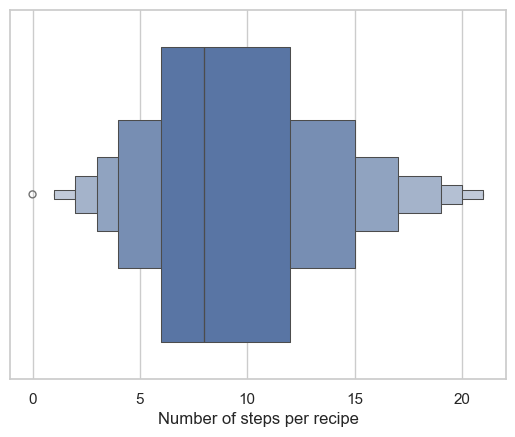

In [78]:
#check again the steps
# Visualize boxen plot
sns.set(style = "whitegrid")
ax = sns.boxenplot(x = raw_recipes_df['n_steps'])
ax.set_xlabel('Number of steps per recipe')
plt.show()

In [79]:
#remove recipes with 0 steps
raw_recipes_df[raw_recipes_df['n_steps'] < 1]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
3381,all season bread,176767,90,331268,2006-07-10,"['time-to-make', 'course', 'main-ingredient', ...","[198.8, 11.0, 70.0, 18.0, 5.0, 5.0, 10.0]",0,[],just change the fruit/vegetable in this recipe...,"['flour', 'baking soda', 'salt', 'baking powde...",12


In [80]:
#check the description of the recipe
raw_recipes_df[raw_recipes_df['n_steps'] < 1]['description'].values[0]

'just change the fruit/vegetable in this recipe and make the (tender, moist, heavy dark) bread your heart desires!  try zucchini in the summer, pumpkin in the fall,  carrot-raisin in the winter, & banana-walnut in the spring. \r\n\r\nuse your imagination.'

GPT can not suggest number of steps, so we will delete it

In [81]:
# Filter for recipes with at least 1 step
raw_recipes_df = raw_recipes_df[raw_recipes_df['n_steps'] > 0]

Revisamos el numero de ingredientes

In [82]:
# Number of ingredients
# Calculate the first quartile, third quartile and the interquartile range
Q1 = raw_recipes_df['n_ingredients'].quantile(0.25)
Q3 = raw_recipes_df['n_ingredients'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# Filter the data for values that are greater than max_value or less than min_value
nsteps_outliers = raw_recipes_df[(raw_recipes_df['n_ingredients'] > max_value) | (raw_recipes_df['n_ingredients'] < min_value)]
nsteps_outliers.sort_values('n_ingredients')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
95755,granola extreme,43916,45,27443,2002-10-22,"['60-minutes-or-less', 'time-to-make', 'course...","[105.0, 10.0, 10.0, 2.0, 5.0, 5.0, 3.0]",9,"[""preheat oven 300' degrees"", 'spray 2 baking ...","wholesome snack, great topping for vanilla yogurt","['oatmeal', 'wheat flakes', 'buckwheat flakes'...",19
137311,mocha mini bread loaves,349861,40,1109972,2009-01-14,"['60-minutes-or-less', 'time-to-make', 'course...","[268.4, 12.0, 75.0, 12.0, 14.0, 11.0, 14.0]",7,"['preheat oven to 350 degrees', 'combine dry i...",this is adapted from camilla saulsbury's muffi...,"['whole wheat flour', 'quick-cooking oats', 't...",19
68576,curried meatballs,315007,35,331557,2008-07-22,"['curries', '60-minutes-or-less', 'time-to-mak...","[414.4, 36.0, 21.0, 32.0, 59.0, 34.0, 6.0]",8,['heat oil over medium heat and stir-fry the o...,i was given this recipe by a co-worker of mine...,"['olive oil', 'onions', 'cinnamon stick', 'wat...",19
214382,tofu spinach calzones vegan or vegetarian,97154,35,37584,2004-08-06,"['60-minutes-or-less', 'time-to-make', 'course...","[346.1, 6.0, 8.0, 14.0, 21.0, 3.0, 21.0]",17,['mix water with yeast and sugar in a large mi...,these are great and vegan or vegetarian (see s...,"['warm water', 'yeast', 'sugar', 'salt', 'flou...",19
68671,curried rice and fruit salad,63805,65,37779,2003-06-05,"['weeknight', 'time-to-make', 'course', 'main-...","[379.1, 11.0, 86.0, 16.0, 12.0, 14.0, 24.0]",18,"['wash rice until water runs clear', 'drain we...",this rice salad has exotic flavors that make a...,"['basmati rice', 'peanut oil', 'green onion', ...",19
...,...,...,...,...,...,...,...,...,...,...,...,...
105723,hillbilly bean soup,11737,255,10404,2001-09-18,"['weeknight', 'time-to-make', 'course', 'main-...","[323.0, 2.0, 254.0, 1.0, 8.0, 1.0, 27.0]",6,"['boil the drained , soaked beans with the wat...",great soup for a fall or winters dinner. serve...,"['7 bean mix', 'water', 'ham bone', 'bay leaf'...",35
203614,sunday supper taco salad bowls tacos,502219,240,695000,2013-06-23,"['time-to-make', 'course', 'cuisine', 'prepara...","[10687.7, 1784.0, 49.0, 67.0, 59.0, 802.0, 26.0]",6,['heat vegetable oil to 350f submerge tortilla...,being served again at the free sunday supper o...,"['flour tortillas', 'ground beef', 'vegetable ...",37
18352,basic fried rice with variations,248707,55,305531,2007-08-25,"['60-minutes-or-less', 'time-to-make', 'course...","[793.3, 22.0, 8.0, 23.0, 37.0, 13.0, 48.0]",16,"['dice or shred meat and vegetables', 'heat oi...",another recipe that i acquired from a chinese ...,"['brown rice', 'green onions', 'oil', 'soy sau...",38
116744,kato s garage style tomato sauce meatba...,113677,270,128473,2005-03-18,"['time-to-make', 'course', 'main-ingredient', ...","[412.8, 36.0, 61.0, 47.0, 46.0, 38.0, 8.0]",9,"['spicy tomatoe & vegetable sauce', 'in a larg...",this is our favourite spagetti dinner...we mak...,"['sweet onion', 'garlic cloves', 'green pepper...",39


Check ratings

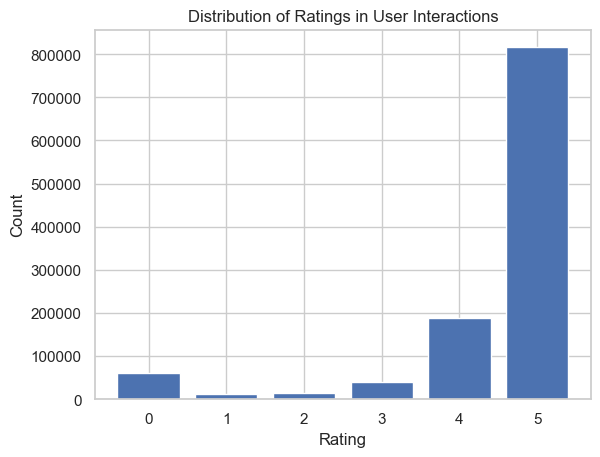

In [83]:
# Distribution of ratings

rating_counts = raw_users_df['rating'].value_counts().sort_index()
ratings = rating_counts.index
counts = rating_counts.values

plt.bar(ratings, counts)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings in User Interactions')

plt.show()

In [84]:
#check ratings 0
raw_users_df[raw_users_df['rating'] == 0]

,user_id,recipe_id,date,rating,review
6,124416,120345,2011-08-06,0,"Just an observation, so I will not rate. I fo..."
12,468945,134728,2008-02-20,0,Made my own buttermilk w/ vinegar and milk. U...
23,681408,225241,2008-03-14,0,This is a very good recipe. We also want to c...
39,2002068522,29093,2018-03-26,0,i made it and it was amazing
56,980899,79222,2010-10-18,0,"I used half cream and half 1% milk, added anot..."
...,...,...,...,...,...
1132318,1197076,190261,2010-03-08,0,Delicious ! I tweeked the recipe a bit>>substi...
1132323,2405600,290157,2014-11-10,0,Just added this mix to a homemade beef &amp; s...
1132325,2000650711,290157,2017-04-10,0,Would this make a good hamburger patty seasoning?
1132361,102526,54493,2007-04-26,0,I am not going to rate this because I did have...


In [85]:
#calculate the percentage of ratings with 0
zero_rating_percentage = (len(raw_users_df[raw_users_df['rating'] == 0]) / len(raw_users_df)) * 100
print(f"Percentage of ratings with 0: {zero_rating_percentage:.2f}%")

Percentage of ratings with 0: 5.37%


In [86]:
#remove reviews with 0 rating
raw_users_df = raw_users_df[raw_users_df['rating'] != 0]

In [87]:
raw_users_df.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


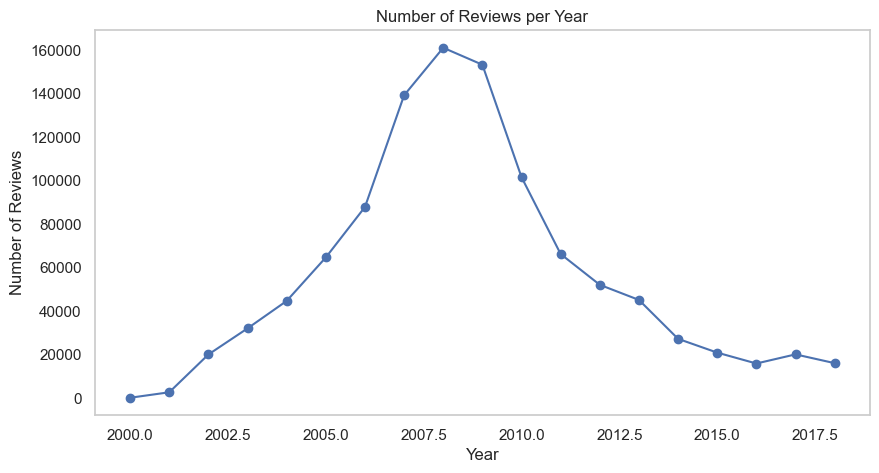

In [88]:
#Check number of reviews per year
raw_users_df['year'] = raw_users_df['date'].dt.year
reviews_per_year = raw_users_df['year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(reviews_per_year.index, reviews_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per Year')
plt.grid()
plt.show()

### Data Transformation

Convert the date column

In [89]:
# Define the month abbreviation mapping
month_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

# Store month and year separately
raw_recipes_df['submitted_month'] = raw_recipes_df['submitted'].dt.month.map(month_mapping)
raw_recipes_df['submitted_year'] = raw_recipes_df['submitted'].dt.year

# Sanity check
raw_recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,submitted_month,submitted_year
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,Sep,2005
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,Jun,2002
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,Feb,2005
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,Apr,2003
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,Oct,2002


In [90]:
# Store month and year separately
raw_users_df['review_month'] = raw_users_df['date'].dt.month.map(month_mapping)
raw_users_df['review_year'] = raw_users_df['date'].dt.year

# Sanity check
raw_users_df.head()

,user_id,recipe_id,date,rating,review,year,review_month,review_year
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,2003,Feb,2003
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",2011,Dec,2011
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,2002,Dec,2002
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,2010,Feb,2010
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",2011,Oct,2011


Dietary Preferences

In [91]:
#loop the tag column to store unique tags and calculate their frequency
from collections import Counter
all_tags = []
for tags in raw_recipes_df['tags']:
    if pd.notnull(tags):
        tag_list = [tag.strip() for tag in tags.split(',')]
        all_tags.extend(tag_list)

tag_counts = Counter(all_tags)

In [92]:
tag_counts

Counter({"'preparation'": 215230,
         "'course'": 199638,
         "'time-to-make'": 174666,
         "'main-ingredient'": 159135,
         "'dietary'": 151100,
         "'easy'": 121536,
         "'occasion'": 106206,
         "'cuisine'": 84433,
         "'low-in-something'": 72831,
         "'main-dish'": 66230,
         "['60-minutes-or-less'": 60093,
         "'vegetables'": 50299,
         "['30-minutes-or-less'": 48699,
         "'meat'": 47233,
         "'north-american'": 45040,
         "'equipment'": 44629,
         "'taste-mood'": 44200,
         "'4-hours-or-less']": 42494,
         "'low-sodium'": 40824,
         "'low-carb'": 40145,
         "['15-minutes-or-less'": 39435,
         "'desserts'": 39189,
         "'healthy'": 38087,
         "['time-to-make'": 36285,
         "'3-steps-or-less']": 35055,
         "'low-cholesterol'": 34987,
         "'beginner-cook'": 34802,
         "'low-calorie'": 34785,
         "'dinner-party'": 34547,
         "'5-ingredients-or

Merge with the ratings dataset

In [94]:
# Create a new df that contains the recipe_id and rating only
user_rating = raw_users_df[['recipe_id', 'rating']].copy()
user_rating

,recipe_id,rating
0,40893,4
1,40893,5
2,44394,4
3,85009,5
4,85009,5
...,...,...
1132360,82303,5
1132363,386618,5
1132364,78003,5
1132365,78003,4


In [95]:
# Group by recipe and take the count and the average rating
user_rating = user_rating.groupby(['recipe_id'])['rating'].agg(['mean','count'])
user_rating.reset_index(inplace=True)

# View table
user_rating.head()

,recipe_id,mean,count
0,100,3.00,2
1,10000,3.00,1
2,100000,4.71,24
3,100001,4.67,3
4,100002,4.00,1


In [96]:
# Rename columns 
user_rating.rename(columns={'mean':'average_rating','count':'votes'},inplace=True)

# View table
user_rating

,recipe_id,average_rating,votes
0,100,3.00,2
1,10000,3.00,1
2,100000,4.71,24
3,100001,4.67,3
4,100002,4.00,1
...,...,...,...
226578,99995,4.55,11
226579,99996,5.00,11
226580,99997,4.00,1
226581,99998,5.00,2


In [97]:
# Merge ratings dataframe with recipe Dataframe
food_df = pd.merge(raw_recipes_df, user_rating, left_on='id',right_on='recipe_id')

# View table
food_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,submitted_month,submitted_year,recipe_id,average_rating,votes
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,Sep,2005,137739,5.00,3
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,Jun,2002,31490,4.67,3
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,Feb,2005,112140,4.00,1
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,Apr,2003,59389,4.50,2
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,Oct,2002,44061,5.00,1


In [98]:
# View shape
food_df.shape

(212256, 17)

In [99]:
#Generate sample of the cleaned data
food_df_sample = food_df.sample(frac=0.25, random_state=42)

In [100]:
#save
# Merged for modelling
food_df_sample.to_pickle("food.pkl")